# Tarea 2 - Mejoramiento de Imágenes

Algunas de las cosas que se tocan en este documento son:
- Calcular el Histograma global y local de una imagen.
- Calcular la Distancia de Error entre dos histogramas. 

In [13]:
# Importamos las librerías necesarias:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage
import scipy.io

## Carga de Imágenes
Primero debemos de cargar las imágenes que se nos proporcionaron. En este caso se nos da un archivo _.mat_ por lo que usaremos scipy para cargar la imagen. En este caso la imagen se carga como un diccionario de Python primero por lo que obtenemos la llave del diccionario que guarda el arreglo de datos de las imagenes y después los gráficamos.

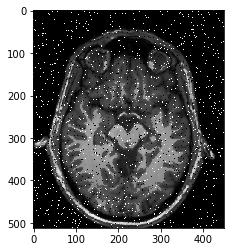

In [14]:
mat = scipy.io.loadmat('./imagenes/Midbrain.mat')
img = mat['midbrainthesh']

plt.imshow(img, cmap='gray')
plt.show()

Como podemos observar, la imagen anterior tiene ruido tipo _salt&pepper_ y una modificiación en el contraste del siguiente tipo:
$$y = (3/8) x + (1/4)x  \text{ --> if x in [0.0 ; 0.4] , y > 0.40 }$$
$$y = x    \text{ --> if x in [0.40 ; 0.60]}$$
$$y = (3/8) x + (3/8)  \text{ --> if x in [0.6 ; 1.0]}$$

Hacemos un histograma del contraste de la imagen para ver como fue modificado:

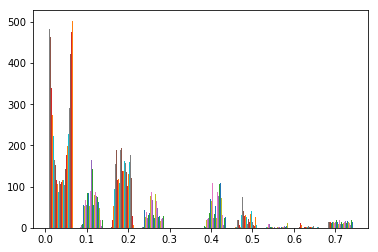

El valor Máximo del arreglo es: 0.75
El valor Mínimo del arreglo es: 0.0


In [15]:
original = plt.hist(img)
plt.show()
print("El valor Máximo del arreglo es: {0}".format(np.amax(img)))
print("El valor Mínimo del arreglo es: {0}".format(np.amin(img)))

In [16]:
type(img)

numpy.ndarray

Para recuperar los valores originales de la imagen es necesario ejecutar la siguiente ecuación:
$$y = x / (3/8+1/4)  \text{ --> if x in [0.0 ; 0.25] , y > 0.40 }$$
$$y = x    \text{ --> if x in [0.40 ; 0.60]}$$
$$y = 8x/3-1  \text{ --> if x in [0.6 ; 0.75]}$$

Para hacer esto tomamos la matriz de nuestra imagen anterior y la multiplicamos por el valor que aplique dependiendo del contraste. arreglo[condicion] = arreglo[cumplio condicion]* valor_normalizacion

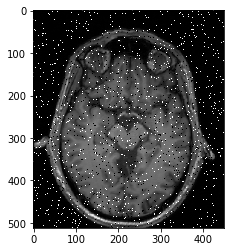

In [17]:
dest = img
dest[img  <= 0.25] = dest[img  <= 0.25]/(3/8+1/4)
dest[img  >= 0.6] = dest[img  >= 0.6]*8/3-1

plt.imshow(dest, cmap='gray')
plt.show()

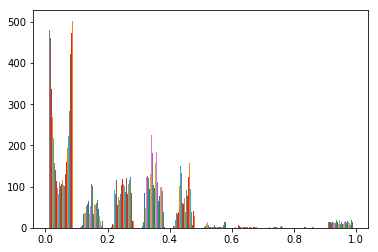

El valor Máximo del arreglo es: 1.0
El valor Mínimo del arreglo es: 0.0


In [18]:
dest_g = plt.hist(dest)
plt.show()
print("El valor Máximo del arreglo es: {0}".format(np.amax(img)))
print("El valor Mínimo del arreglo es: {0}".format(np.amin(img)))

Ahora, ya recuperamos el contraste de la imagen original. Solamente es necesaerio que eliminemos el ruido Salt & Pepper que tiene la imagen. Para hacer esto debemos de seguir los siguientes pasos:

1. Conseguimos la altura y longitud de nuestra imagen.
2. Elegimos el tamaño de nuestra ventana (conjunto de pixeles)
3. 

Para realizar estas acciones usaremos el modulo scikit-image que nos da un conjunto de herramientas para el tratamiento de imagenes. En este caso nos interesa calcular la desviación estandar de la imagen con ruido y los algoritmos para quitar el ruido utilizando _Non-local means denoising_ que nos permite preservar las texturas y al mismo tiempo eliminar el ruido.

Para instalar este modulo solo es necesario ir al manejador de paquetes de Canopy e instalar scikit-image

In [19]:

from skimage import img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.measure import compare_psnr


sigma_est = np.mean(estimate_sigma(dest, multichannel=True))


patch_kw = dict(patch_size=2,      # 3x3 patches
                patch_distance=4,  # 13x13 search area
                multichannel=True)

filtered = denoise_nl_means(dest,  h=1.3, fast_mode=False,
                           **patch_kw)

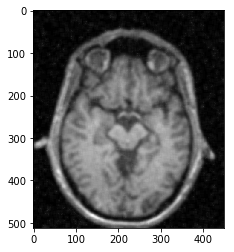

In [20]:
plt.imshow(filtered,cmap='gray')
plt.show()

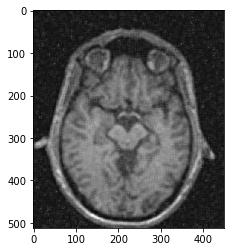

In [21]:
gaussian_3 = cv2.GaussianBlur(filtered, (9,9), 5.0)
unsharp_image = cv2.addWeighted(filtered, 0.8, gaussian_3, -0.5, 0, filtered)
plt.imshow(unsharp_image,cmap='gray')
plt.show()